# TOC

__Lab 05 - linear regression plus extensions__
1. [Import](#Import)
1. [Gradient descent](#Gradient-descent)
    1. [Example 1 - simple gradient descent](#Gradient-descent-Example1)
1. [Normal equation](#Normal-equation)
    1. [Example 1 - normal equation](#Normal-equation-Example1)
1. [Learning rate w/ varying batch size](#Learning-rate-w-varying-batch-size)
    1. [Example 1 - full gradient descent w/ varying learning rate](#Learning-rate-w/-varying-batch-size-Example1)
    1. [Example 2 - stochastic (single sample) gradient descent](#Learning-rate-w/-varying-batch-size-Example2)
    1. [Example 3 - mini-batch gradient descent](#Learning-rate-w/-varying-batch-size-Example3)
1. [Polynomial regression](#Polynomial-regression)
    1. [Example 1 - model polynomial feature data set](#Polynomial-regression-Example1)
    1. [Example 2 - models of varying degree](#Polynomial-regression-Example2)
1. [Regularization](#Regularization)
    1. [Example 1 - lasso regression](#Regularization-Example1)
    1. [Example 2 - ridge regression](#Regularization-Example2)
    1. [Example 3 - ElasticNew linear regression](#Regularization-Example3)
1. [Case study - boston housing market](#Case-study-boston)
1. [Sequential feature selection](#Sequential-feature-selection)
    1. [Example 1 - Selecting meaningful features for regression](#Sequential-feature-selection-Example1)
    1. [Example 2 - Selecting meaningful features for classification](#Sequential-feature-selection-Example2)
1. [Feature importance assessment using random forest](#Feature-importance-assessment)
1. [Parameter adjustment effects](#Parameter-adjustment-effects)


# Import

<a id = 'Import'></a>

In [1]:
# standard libary and settings
import os
import sys
import importlib
import itertools
import warnings

warnings.simplefilter("ignore")
dataPath = os.path.abspath(os.path.join("../../Data"))
modulePath = os.path.abspath(os.path.join("../../CustomModules"))
sys.path.append(modulePath) if modulePath not in sys.path else None
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:95% !important; }</style>"))

# data extensions and settings
import numpy as np

np.set_printoptions(threshold=np.inf, suppress=True)
import pandas as pd

pd.set_option("display.max_rows", 500)
pd.options.display.float_format = "{:,.6f}".format

# modeling extensions
import sklearn.base as base
import sklearn.cluster as cluster
import sklearn.datasets as datasets
import sklearn.decomposition as decomposition
import sklearn.ensemble as ensemble
import sklearn.feature_extraction as feature_extraction
import sklearn.feature_selection as feature_selection
import sklearn.linear_model as linear_model
import sklearn.metrics as metrics
import sklearn.model_selection as model_selection
import sklearn.neighbors as neighbors
import sklearn.pipeline as pipeline
import sklearn.preprocessing as preprocessing
import sklearn.svm as svm
import sklearn.tree as tree

# visualization extensions and settings
import seaborn as sns
import matplotlib.pyplot as plt

# custom extensions and settings
sys.path.append("/home/mlmachine") if "/home/mlmachine" not in sys.path else None
sys.path.append("/home/prettierplot") if "/home/prettierplot" not in sys.path else None

import mlmachine as mlm
import prettierplot as ptp


# from pretter import qp, qpUtil, qpStyle
# from mlTools import powerGridSearch
sns.set(rc=ptp.style.rcGrey)

# magic functions
%matplotlib inline

# Gradient descent

Cost function for linear regression:

$
\text{MSE} = \dfrac{1}{2m} \sum\limits_{i=1}^{m}{(\mathbf{\theta}^T \cdot \mathbf{x}^{(i)} - y^{(i)})^2}
$

The dot product of the weight vector $\theta$ and sample array $\textbf{x}^{(i)}$ is the prediction. Subtracting the true value from the prediction and squaring the result yields the squared error. Summing the errors and dividing by 2 times the total number of samples $m$ equals the one-half mean squared error. The 'one-half' component makes the derivative simpler and has no bearing on the final result since this is merely multiplication by a scalar.

<br><br>
The partial derivative for each weight $\theta_j$ is calculated by:

$
\dfrac{\partial}{\partial \theta_j} \text{MSE}(\mathbf{\theta}) = \dfrac{1}{m}\sum\limits_{i=1}^{m}(\mathbf{\theta}^T \cdot \mathbf{x}^{(i)} - y^{(i)})\, x_j^{(i)}
$

This is the derivative of the MSE cost function. The partial derivative for each weight $\theta_j$ is calculated by summing the product of the prediction error and the sample vector feature value  $x^{(i)}_j$, and then dividing by the number of samples $m$.

<br><br>
The complete gradient vector is calculated by:

$
\nabla_{\mathbf{\theta}}\, \text{MSE}(\mathbf{\theta}) =
\begin{pmatrix}
 \frac{\partial}{\partial \theta_0} \text{MSE}(\mathbf{\theta}) \\
 \frac{\partial}{\partial \theta_1} \text{MSE}(\mathbf{\theta}) \\
 \vdots \\
 \frac{\partial}{\partial \theta_n} \text{MSE}(\mathbf{\theta})
\end{pmatrix}
 = \dfrac{1}{m} \mathbf{X}^T \cdot (\mathbf{X} \cdot \mathbf{\theta} - \mathbf{y})
$

The gradient is determined by taking the dot product of the feature matix and the prediction array and dividing by the number of obserations in $\textbf{X}$.

<br><br>
Finally, the weights are adjusted by a gradient descent step:

$
\mathbf{\theta}^{(\text{next step})} = \mathbf{\theta} - \eta \nabla_{\mathbf{\theta}}\, \text{MSE}(\mathbf{\theta})
$

Where $\eta$ is the learning rate.

<a id = 'Gradient-descent'></a>

## Example 1 - simple gradient descent

Given the current weight vector $\theta$ = [2, -1, 4, 8] for a linear regression model, and a single training example $\mathbf{x}_{i}$ = [1, 5, 1, 2] (in augmented form), and a learning rate, $\eta$ of 0.01 , calculate the new weight vector after doing a single gradient descent step.

$$ 
\begin{bmatrix} w^{new}_1 \\ w^{new}_2 \\ w^{new}_3 \\ w^{new}_4 \end{bmatrix}
= \begin{bmatrix} w^{curr}_1 \\ w^{curr}_2 \\ w^{curr}_3 \\ w^{curr}_4 \end{bmatrix}
- \eta
* \bigg(\dfrac{1}{m} \big(\mathbf{X}^T \cdot (\mathbf{X} \cdot \mathbf{\theta} - \mathbf{y})\big)\bigg)
$$


<a id = 'Gradient-descent-Example1'></a>

In [2]:
# set data and parameters
X = np.array([1.0, 5.0, 1.0, 2.0])
w = np.array([2.0, -1.0, 4.0, 8.0])
eta = 0.01
y = 6.0
m = 1

In [3]:
# complete one step
gradient = (1 / m) * np.dot(X, (w.dot(X.T) - y))
w = w - eta * gradient
print("Updated weights: {0}".format(w))

Updated weights: [ 1.89 -1.55  3.89  7.78]


# Normal equation

The previous examples illustrates weight optimization using calculus. The normal equation is an alternative that relies only on linear alegbra. The normal equation has the form:

$
\hat{\mathbf{\theta}} = (\mathbf{X}^T \cdot \mathbf{X})^{-1} \cdot \mathbf{X}^T \cdot \mathbf{y}
$

This can be much more computationally expensive than gradient descent when learning large data sets.

<a id = 'Normal-equation'></a>

## Example 1 - normal equation


<a id = 'Normal-equation-Example1'></a>

In [4]:
# load and inspect data
X = 2 * np.random.rand(200, 1)
y = 4 + 3 * X + np.random.randn(200, 1)
df = pd.DataFrame(np.hstack((X, y)), columns=["sample", "target"])
df.insert(loc=0, column="bias", value=1.0)
df[:5]

,bias,sample,target
0,1.000000,0.980693,7.629902
1,1.000000,0.406620,5.470429
2,1.000000,1.839874,9.028741
3,1.000000,1.084453,6.595815
4,1.000000,1.357193,8.485452


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


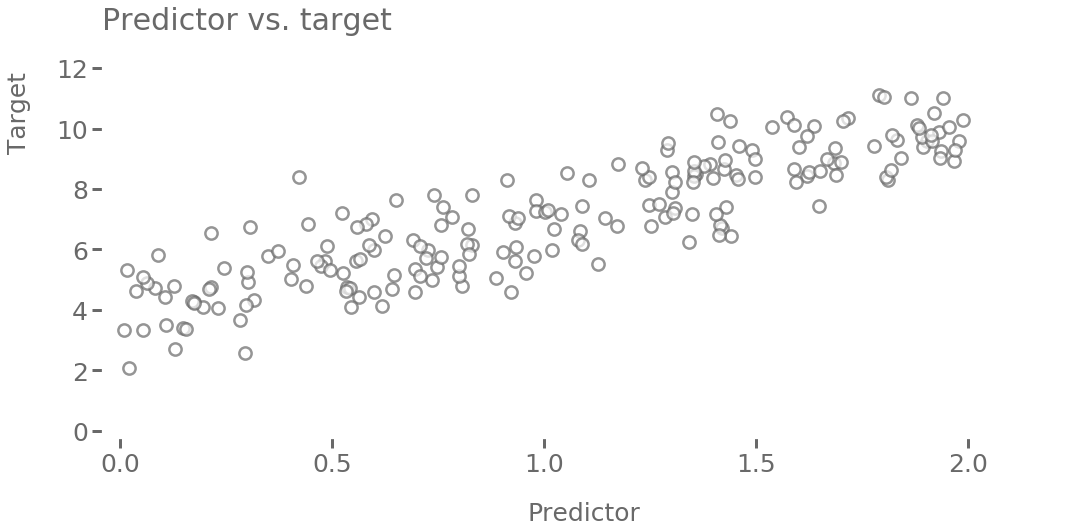

In [5]:
# scatter sample value vs. target
p = ptp.plotter.PrettierPlot(fig=plt.figure(), chart_prop=15)
ax = p.make_canvas(
    title="Predictor vs. target",
    x_label="Predictor",
    y_label="Target",
    y_shift=0.85,
    position=111,
)
p.scatter_2d(x="sample", y="target", df=df, x_units="ff", ax=ax)

In [6]:
# determine weights using normal equation
xB = np.c_[np.ones((200, 1)), X]
theta_best = np.linalg.inv(xB.T.dot(xB)).dot(xB.T).dot(y)
theta_best

array([[3.85251359],
       [3.12721802]])

> Remarks - Intercept and weight for the learned model

In [7]:
# create two test cases and predict
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [8]:
# create predictions and review
y_pred = X_new_b.dot(theta_best)
y_pred

array([[ 3.85251359],
       [10.10694962]])

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


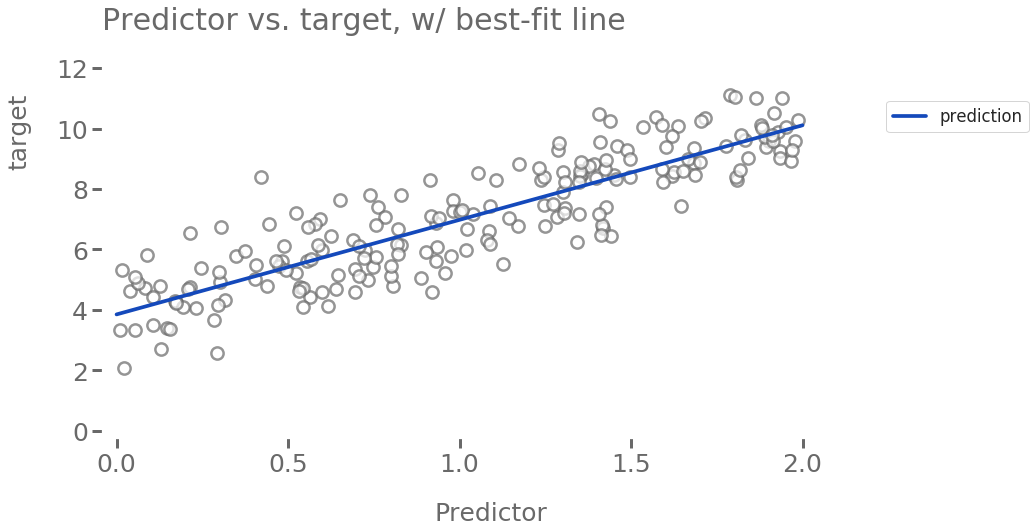

In [9]:
# scatter plot with line of best fit
p = ptp.plotter.PrettierPlot(fig=plt.figure(), chart_prop=15)
ax = p.make_canvas(
    title="Predictor vs. target, w/ best-fit line",
    x_label="Predictor",
    y_label="target",
    y_shift=0.8,
    position=111,
)
p.scatter_2d(x="sample", y="target", df=df, x_units="f", y_units="f", ax=ax)
p.line(x=X_new, y=y_pred, label=["prediction"], x_units="ff", ax=ax)

In [10]:
# learn weights w/ linear regression
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X, y)
print("Model intercept: {0}".format(lin_reg.intercept_[0]))
print("Model slope: {0}".format(lin_reg.coef_[0][0]))

Model intercept: 3.852513587209636
Model slope: 3.1272180171571033


In [11]:
# generate predictions
lin_reg.predict(X_new)

array([[ 3.85251359],
       [10.10694962]])

> Remarks - Identical to closed form solution

# Learning rate w/ varying batch size

The amount of training data used by gradient descent to learning the data affects both the speed and steadiness of the learning process. 

On one end of the spectrum, "full batch" gradient descent, which uses the entire training set, is most likely to improve toward the optimum solution in steadily improving steps before arriving at the desired minumum. The downside is that this method can be computationally expense with very large data sets.

Alternatively, stochastic gradient descent uses just a single sample to update model weights. The steps toward the optimum model are often much more erratic compared to full batch gradient descent, but the computationaly overhead is much smaller and tends to fit the model much more quickly.

"Mini batch" gradient descent achieves a balance between full batch and stochastic gradient descent by adjusting the weights using a subset of the full data set.

<a id = 'Learning-rate-w-varying-batch-size'></a>

## Example 1 - full gradient descent w/ varying learning rate

Observe how model fitting differs based on chosen value for $\eta$

<a id = 'Learning-rate-w/-varying-batch-size-Example1'></a>

__Custom functions__

In [12]:
# custom function for plotting full-batch gradient descent
def plot_gradient_descent(df, theta, eta, n_iter, position):
    """
    Documentation:
        Description: Plot 2-dimensional data set and overlay line plots illustrating full-batch gradient descent.

        Parameters:
            df : Pandas DataFrame
                Data set to learn and plot.
            theta : list
                Initial model weights.
            eta : float
                Model learning rate.
            n_iter : int
                Number of iteration to run optimization.
            position : integer (nrows, ncols, index)
                Subplot locatation.
    """
    # segment DataFrame into data arrays
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values.reshape(-1, 1)
    m = len(df)

    # plot data points
    ax = p.make_canvas(
        title="$\eta$ = {}".format(eta),
        x_label="$x_1$",
        y_label="$y$",
        y_shift=0.8,
        position=position,
    )
    p.scatter_2d(x="sample", y="target", df=df, ax=ax)

    # complete full-batch gradient decent, plot initial weight improvements for illustration
    for iteration in range(n_iter):
        if iteration < 20:
            y_pred = np.dot(X, theta)
            p.line(
                x=X[:, 1],
                y=y_pred,
                linecolor=ptp.style.style_hex_mid[1]
                if iteration == 0
                else ptp.style.style_hex_mid[0],
                x_units="ff",
                ax=ax,
            )

        gradients = (1 / m) * np.dot(X.T, (np.dot(X, theta) - y))
        theta = theta - eta * gradients

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


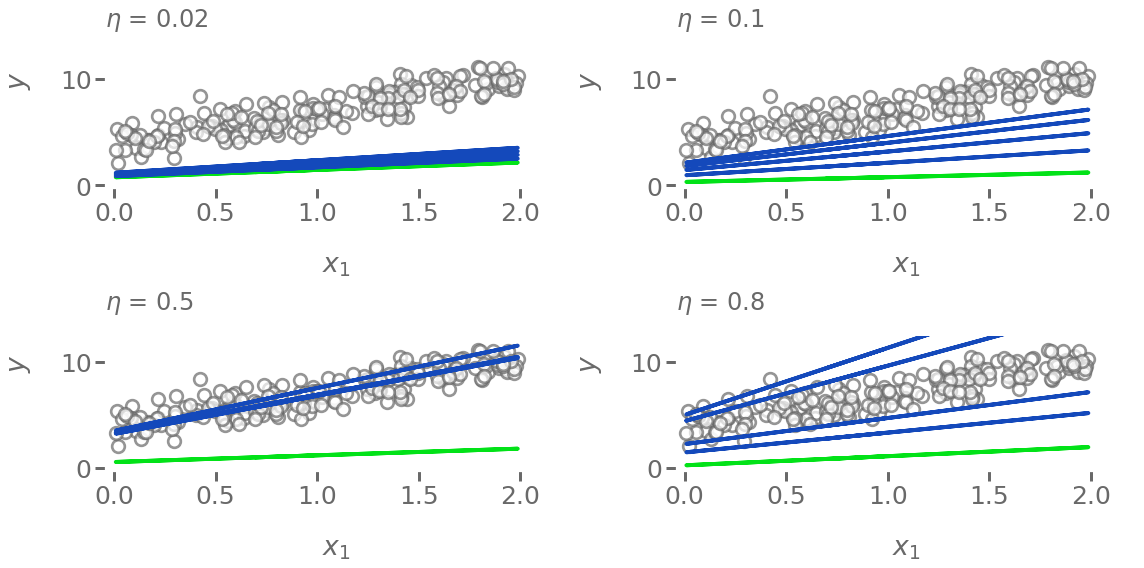

In [13]:
# execute and visualize full-batch gradient descent for varying eta values
p = ptp.plotter.PrettierPlot(fig=plt.figure(), chart_prop=16)
for eta, position in zip([0.02, 0.1, 0.5, 0.8], [221, 222, 223, 224]):
    plot_gradient_descent(
        df=df, theta=np.random.rand(2, 1), eta=eta, n_iter=5, position=position
    )

> Remarks - The four graphs above illustrate the speed of learning with different values of $\eta$. The red line corresponds to the first iterations, and 
- $\eta$ = 0.02: Speed of learning is slow. Weight optimization not achieved within 20 iterations, but will likely happen eventually.
- $\eta$ = 0.1: Speed of learning is gradual. Weight optimization appears to be achieved within 1520initial weight updates
- $\eta$ = 0.5: Speed of learning is quickly. Weight optimization occurs within first few iterations
- $\eta$ = 0.8: Speed of learning is perhaps too quickly. It's unclear if weight optimization finds the best model bounces or around the minimum.


## Example 2 - stochastic (single sample) gradient descent

Observe how model fitting differs when using stochastic gradient descent, which using merely one observation

<a id = 'Learning-rate-w/-varying-batch-size-Example2'></a>

__Custom functions__

In [14]:
# custom function for plotting stochastic gradient descent
def learning_schedule(t, t0, t1):
    """
    Documentation:
        Description: Learning schedule for eta that gradually reduces the size of eta following each iteration at a slowing rate.

        Parameters:
            t : int
                Amount added to denominator. Will be setup to increase after each iteration.
            t0 : int
                Numerator. Smaller initial values lead to small eta values.
            t1 : int
                Denominator. Smaller initial values lead to larger eta values.
    """
    return t0 / (t + t1)


def plot_stochastic_gradient_descent(df, theta, n_iter, t0, t1):
    """
    Documentation:
        Description: Plot 2-dimensional data set and overlay line plots illustrating stochastic gradient descent.

        Parameters:
            df : Pandas DataFrame
                Data set to learn and plot.
            theta : list
                Initial model weights.
            n_iter : int
                Number of iteration to run optimization.
            t0 : int
                Parameter for learning schedule function.
            t1 : int
                Parameter for learning schedule function.
    """
    # segment DataFrame into data arrays
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values.reshape(-1, 1)
    m = len(df)

    # plot data points
    ax = p.make_canvas(
        title="Stochastic gradient descent", x_label="$x_1$", y_label="$y$", y_shift=0.8
    )
    p.scatter_2d(x="sample", y="target", df=df, ax=ax)

    # complete stochastic gradient decent, plot initial weight improvements for illustration
    for iteration in range(n_iter):
        for i in np.arange(m):
            if iteration == 0 and i < 15:
                y_pred = np.dot(X, theta)

                p.line(
                    x=X[:, 1],
                    y=y_pred,
                    linecolor=ptp.style.style_hex_mid[1]
                    if i == 0
                    else ptp.style.style_hex_mid[0],
                    x_units="ff",
                    ax=ax,
                )
            xi = X[i : i + 1]
            yi = y[i : i + 1]
            gradients = (1 / len(xi)) * np.dot(xi.T, (np.dot(xi, theta) - yi))
            eta = learning_schedule(t=iteration * m + 1, t0=t0, t1=t1)
            theta = theta - eta * gradients

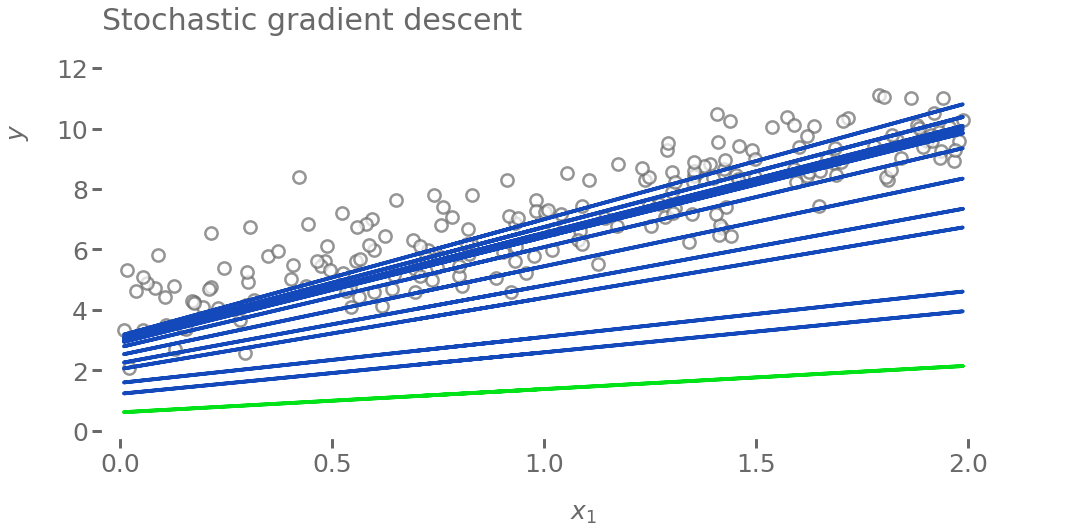

In [15]:
# execute and visualize stochastic gradient descent for varying eta values
p = ptp.plotter.PrettierPlot(fig=plt.figure(), chart_prop=15)
plot_stochastic_gradient_descent(df=df, theta=np.random.rand(2, 1), n_iter=10, t0=5, t1=50)

> Remarks - The graph above illustrate the speed of learning that can be achieved even by updating the weights with one sample, as opposed to the full batch. This method also implements a learning schedule function, which adjusted the value of $\eta$ downward at a increasingly slowing rate. The red line corresponds to the first iterations, and the process appears to find the optimum weights quickly.

> This final theta is displayed for comparison to the scikit-learn implementation of linear regresion.


## Example 3 - mini-batch gradient descent

Observe how model fitting differs when using only a subset of observations

<a id = 'Learning-rate-w/-varying-batch-size-Example3'></a>

__Custom functions__

In [16]:
# custom function for plotting mini-batch gradient descent
def plotBatchGradientDescent(df, theta, n_iter, t0, t1, batch_size):
    """
    Documentation:
        Description: Plot 2-dimensional data set and overlay line plots illustrating mini-batch gradient descent.

        Parameters:
            df : Pandas DataFrame
                Data set to learn and plot.
            theta : list
                Initial model weights.
            n_iter : int
                Number of iteration to run optimization.
            t0 : int
                Parameter for learning schedule function.
            t1 : int
                Parameter for learning schedule function.
            batch_size : int
                Number of samples to be included in each iteration. A value of 1 would be equal to stochastic gradient descent.
    """
    # segment DataFrame into data arrays
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values.reshape(-1, 1)
    m = len(df)

    # plot data points
    ax = p.make_canvas(
        title="Mini-batch gradient descent", x_label="$x_1$", y_label="$y$", y_shift=0.8
    )
    p.scatter_2d(x="sample", y="target", df=df, ax=ax)

    # complete mini-batch gradient decent, plot initial weight improvements for illustration
    for iteration in range(n_iter):
        shuffledIx = np.random.permutation(m)
        X = X[shuffledIx]
        y = y[shuffledIx]
        for i in np.arange(0, m, batch_size):
            if iteration == 0 and i < 100:
                y_pred = np.dot(X, theta)
                p.line(
                    x=X[:, 1],
                    y=y_pred,
                    linecolor=ptp.style.style_hex_mid[1]
                    if i == 0
                    else ptp.style.style_hex_mid[0],
                    x_units="ff",
                    ax=ax,
                )

            xi = X[i : i + batch_size]
            yi = y[i : i + batch_size]
            gradients = (1 / len(xi)) * np.dot(xi.T, (np.dot(xi, theta) - yi))
            eta = learning_schedule(t=iteration * m + 1, t0=t0, t1=t1)
            theta = theta - eta * gradients
    print("Final theta: {0}".format(theta))

Final theta: [[3.56032281]
 [3.37026084]]


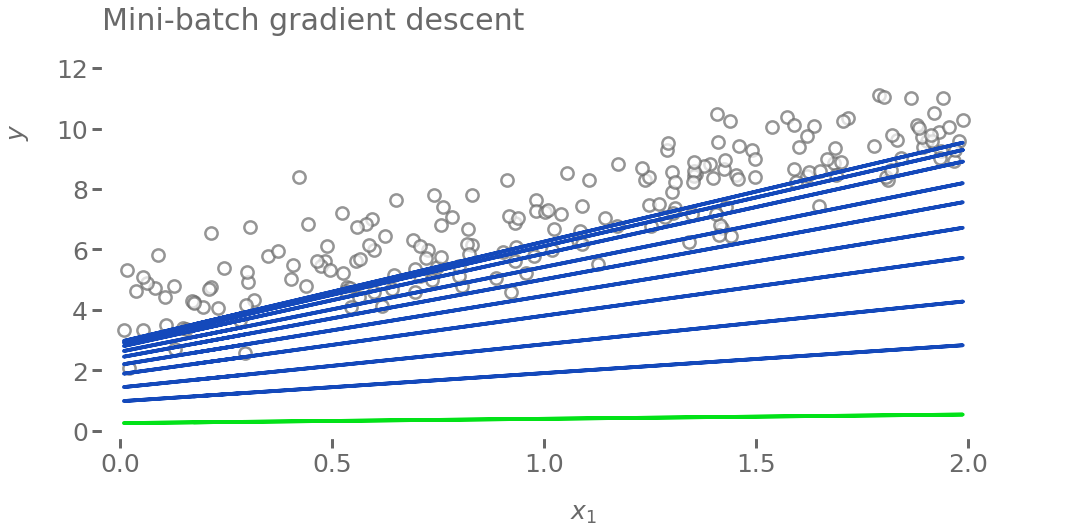

In [17]:
# execute and visualize full-batch gradient descent for varying eta values
p = ptp.plotter.PrettierPlot(fig=plt.figure(), chart_prop=15)
plotBatchGradientDescent(
    df=df, theta=np.random.rand(2, 1), n_iter=50, t0=10, t1=100, batch_size=10
)

> The graph above illustrate the speed of learning that can be achieved even by updating the weights using 10% of the samples, as opposed to the full batch. This method also implements a learning schedule function, which adjusted the value of $\eta$ downward at a increasingly slowing rate. The red line corresponds to the first iterations, and the process appears to find the optimum weights quickly.

> This final theta is displayed for comparison to the scikit-learn implementation of linear regresion.


# Polynomial regression

Polynomial regression is a form of regression analysis that models a nonlinear relationship between $\textbf{X}$ and $y$.

The expected value of $y$ is modeled as an nth degree polynomial:

$$
y=\beta _{0}+\beta _{1}x+\beta _{2}x^{2}+\beta _{3}x^{3}+\cdots +\beta _{n}x^{n}+\varepsilon
$$

<a id = 'Polynomial-regression'></a>

## Example 1 - model polynomial feature data set

Generate data set with nonlinear relationship between $\textbf{X}$ and $y$. Add polynomial features of varying degrees to $\textbf{X}$ and create models to describe $y$

<a id = 'Polynomial-regression-Example1'></a>

In [18]:
# generate data
m = 200
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X ** 2 + np.random.randn(m, 1)

df = pd.DataFrame(np.hstack((X, y)), columns=["sample", "target"])

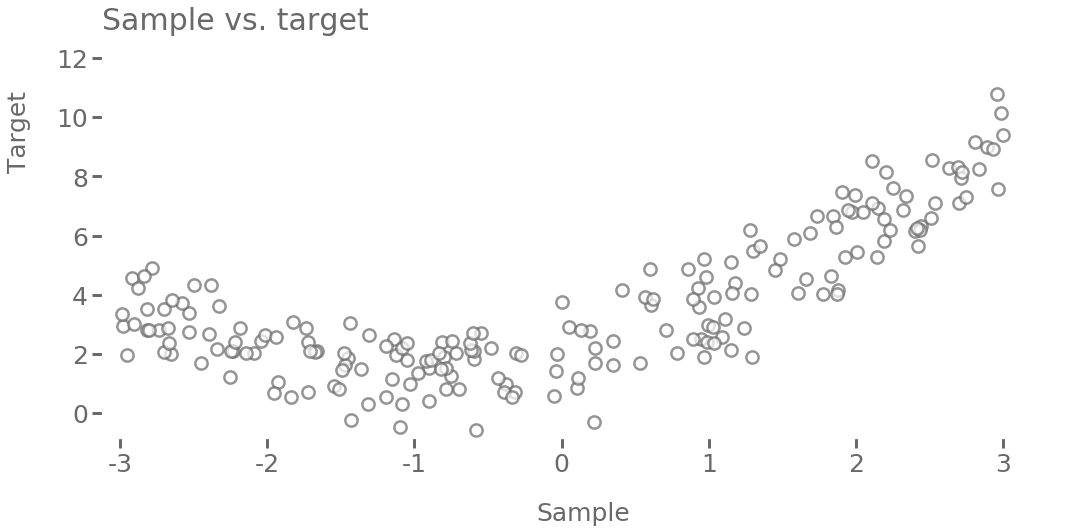

In [19]:
# scatter sample vs. target
p = ptp.plotter.PrettierPlot(fig=plt.figure(), chart_prop=15)
ax = p.make_canvas(
    title="Sample vs. target",
    x_label="Sample",
    y_label="Target",
    y_shift=0.8,
    position=111,
)
p.scatter_2d(x="sample", y="target", df=df, x_units="f", y_units="f", ax=ax)

__Degree-2 polynomial__

In [20]:
# create polynomial features
poly_feat = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_feat.fit_transform(X)

print("Feature column X now has shape {0}".format(X_poly.shape))
print("First row: [x, x\u00b2] = {0}".format(X_poly[:1]))

Feature column X now has shape (200, 2)
First row: [x, x²] = [[0.92485955 0.85536518]]


In [21]:
# review target and feature values
df = pd.DataFrame(np.c_[y, np.array(X_poly)], columns=["target", "sample", "sample2"])
df.head()

,target,sample,sample2
0,4.240662,0.924860,0.855365
1,4.858383,0.855462,0.731815
2,1.986348,-2.655025,7.049156
3,3.377478,-2.534913,6.425786
4,6.076217,1.690788,2.858765


> sklearn.preprocessing.PolynomialFeatures - Generates a new feature matrix consisting of all polynomial combinations of the features with degree <= specified degree. If input is two dimensional (columns a,b), then the degree 2 polynomial features will be 1, $a$, $b$, $a^2$, $ab$, and $b^2$
- The parameter 'interaction_only' supresses the features taken to a degree
- The parameter 'include_bias' supresses the feature that is 1 throughout

source: [sklearn docs - preprocessing.PolynomialFeatures](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

> Remarks - model explains nearly 85% of the variance. Both independent variables are significant.

In [22]:
# sklearn linear regression
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_poly, y)

print("Intercept = {0}".format(lin_reg.intercept_))
print("coefficients = {0}".format(lin_reg.coef_))

print("sklearn r-squared = {0}".format(lin_reg.score(X_poly, y)))

Intercept = [2.01667959]
coefficients = [[0.95883503 0.4985958 ]]
sklearn r-squared = 0.8330832830278798


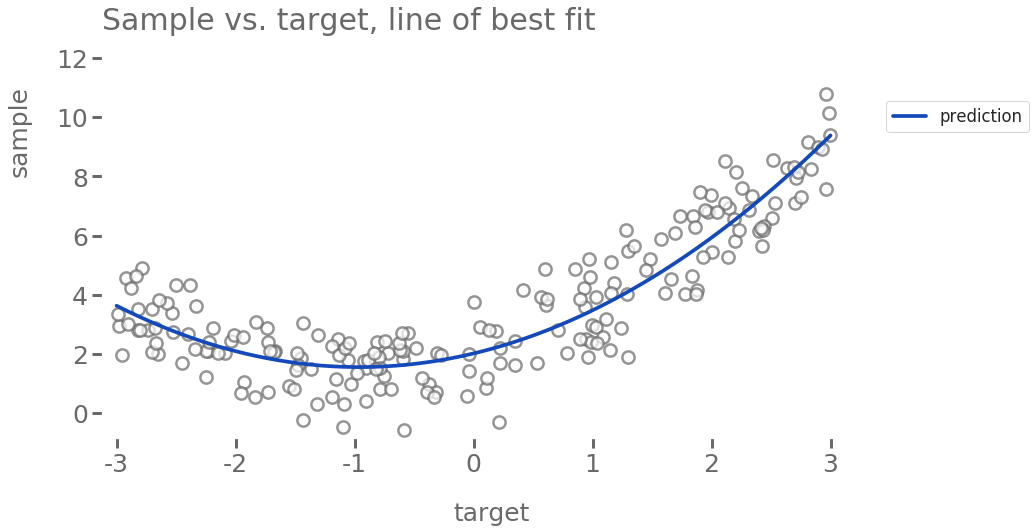

In [23]:
# visualize data and overlay line of best fit
p = ptp.plotter.PrettierPlot(fig=plt.figure(), chart_prop=15)
ax = p.make_canvas(
    title="Sample vs. target, line of best fit",
    x_label="target",
    y_label="sample",
    y_shift=0.8,
    position=111,
)
p.scatter_2d(x="sample", y="target", df=df, ax=ax)
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly_feat.transform(X_new)
y_pred = lin_reg.predict(X_new_poly)

p.line(x=X_new, y=y_pred, label=["prediction"], ax=ax)

__Degree-5 polynomial__

In [24]:
# create polynomial features
poly_feat = preprocessing.PolynomialFeatures(degree=5, include_bias=False)
X_poly_5 = poly_feat.fit_transform(X)

print("Feature column $X$ now has shape {0}".format(X_poly_5.shape))
print("First row: [x, x\u00b2, ... x\u207f] = {0}".format(X_poly_5[:1]))

Feature column $X$ now has shape (200, 5)
First row: [x, x², ... xⁿ] = [[0.92485955 0.85536518 0.79109266 0.7316496  0.67667312]]


In [25]:
# review target ad polynomial feature values
df = pd.DataFrame(
    np.c_[y, np.array(X_poly_5)], columns=["Y", "X", "XP2", "XP3", "XP4", "XP5"]
)
df.head()

,Y,X,XP2,XP3,XP4,XP5
0,4.240662,0.924860,0.855365,0.791093,0.731650,0.676673
1,4.858383,0.855462,0.731815,0.626040,0.535554,0.458146
2,1.986348,-2.655025,7.049156,-18.715685,49.690607,-131.929792
3,3.377478,-2.534913,6.425786,-16.288811,41.290727,-104.668418
4,6.076217,1.690788,2.858765,4.833567,8.172539,13.818033


> Remarks - model explains nearly 85% of the variance, but is slightly worse than the model learned on the $x^2$ data set despite the extra data. The additional variables $x^3$, $x^4$ and $x^5$ are not significant.

In [26]:
# sklearn linear regression
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_poly_5, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
# review model parameters and R-squared
print("Intercept = {0}".format(lin_reg.intercept_))
print("coefficients = {0}".format(lin_reg.coef_))
print("sklearn r-squared = {0}".format(lin_reg.score(X_poly_5, y)))

Intercept = [1.96387789]
coefficients = [[ 1.1869879   0.56252115 -0.08214853 -0.00828817  0.00616395]]
sklearn r-squared = 0.8354875135707421


## Example 2 -  models of varying degree


<a id = 'Polynomial-regression-Example2'></a>

In [28]:
# generate data
np.random.seed(42)
m = 200
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X ** 2 + np.random.randn(m, 1)

df = pd.DataFrame(np.hstack((X, y)), columns=["sample", "target"])

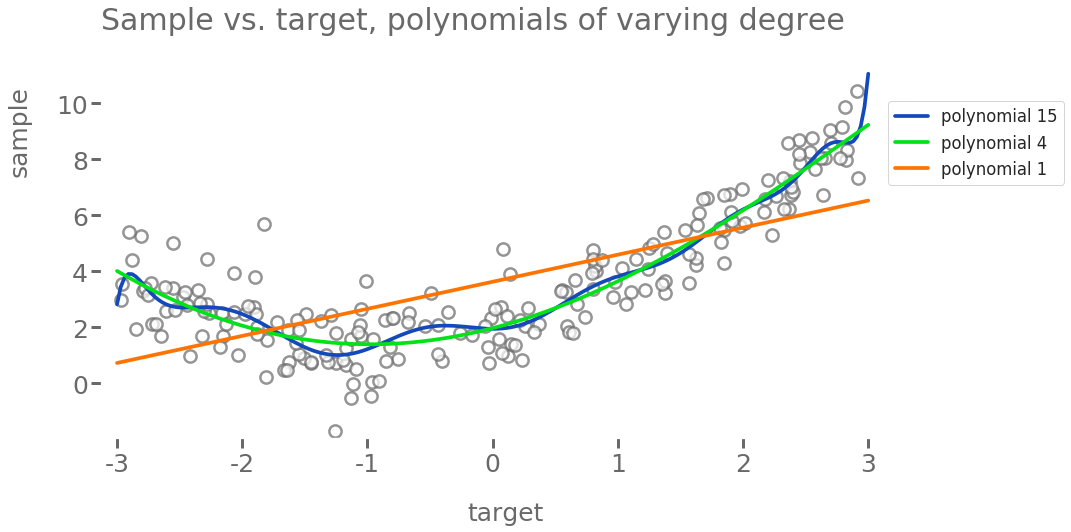

In [29]:
# plot polynomial models of varying degrees
p = ptp.plotter.PrettierPlot(fig=plt.figure(), chart_prop=15)
ax = p.make_canvas(
    title="Sample vs. target, polynomials of varying degree",
    x_label="target",
    y_label="sample",
    y_shift=0.8,
    position=111,
)
p.scatter_2d(x="sample", y="target", df=df, x_units="f", y_units="f", ax=ax)
for ix, degree in enumerate([15, 4, 1]):
    polynomial_reg = pipeline.Pipeline(
        (
            (
                "poly_feat",
                preprocessing.PolynomialFeatures(degree=degree, include_bias=False),
            ),
            ("stdScaler", preprocessing.StandardScaler()),
            ("lin_reg", linear_model.LinearRegression()),
        )
    )
    polynomial_reg.fit(X, y)
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    y_pred = polynomial_reg.predict(X_new)

    p.line(
        x=X_new,
        y=y_pred,
        label=["polynomial {0}".format(degree)],
        linecolor=ptp.style.style_hex_mid[ix],
        y_multi_val=True,
        ax=ax,
    )

<a id = 'Training-set-size-analysis'></a>

# Regularization

Regularization is a method for addressing overfitting. Models that overfit data are often too complex and exhibit high variance, resulting in a model that fits the training data well and the test data poorly. A couple possible solution include:
- Penalize complexity via regularization
- Choose a simpler model with fewer parameters

Regularization in linear regression strives to achieve these goals, and generally comes in two different forms (as well as a hybrid of the two).

##### Lasso regression

Lasso regression, or L1-regulariziation, involves adding a penalty term to the cost function:

$$
J(\mathbf{\theta}) = \text{MSE}(\mathbf{\theta}) + \alpha \sum\limits_{i=1}^{m}\left| \theta_i \right|
$$

The penalty is equal to the sum of the absolute values of the weights, multiplied by a hyperparamter $\alpha$. This penalty can reduce the magnitude of individuals weights, and go as far to reduce weights to zero, which effectively performs feature selection.

Lasso regression sub-gradient vector:

$$
g(\mathbf{\theta}, J) = \nabla_{\mathbf{\theta}}\, \text{MSE}(\mathbf{\theta}) + \alpha
\begin{pmatrix}
  \operatorname{sign}(\theta_1) \\
  \operatorname{sign}(\theta_2) \\
  \vdots \\
  \operatorname{sign}(\theta_n) \\
\end{pmatrix} \quad \text{where } \operatorname{sign}(\theta_i) =
\begin{cases}
-1 & \text{if } \theta_i < 0 \\
0 & \text{if } \theta_i = 0 \\
+1 & \text{if } \theta_i > 0
\end{cases}
$$

##### Ridge regression

Ridge regression, or L2-regulariziation, also adds a penalty term to the cost function:

$$
J(\mathbf{\theta}) = \text{MSE}(\mathbf{\theta}) + \alpha \sum\limits_{i=1}^{m}{\theta_i^2}
$$

The penalty is equal to the sum of the squared weights, multiplied by a hyperparamter $\alpha$. This penalty can reduce the magnitude of individuals weights, but does not go as far to reduce weights to zero, and therefore does not perform features selection.

##### ElasticNet regression

ElasticNet linear regression is a hybrid of ridge and lasso regression, and uses the cost function:

$$
J(\mathbf{\theta}) = \text{MSE}(\mathbf{\theta}) + \rho \alpha \sum\limits_{i=1}^{m}\left| \theta_i \right| + (1 - \rho) \alpha \sum\limits_{i=1}^{m}{\theta_i^2}
$$

Both the lasso and ridge penalties are added to the MSE. In addition to the alpha parameter, the penalties are controlled by an additional paramter $\rho$. When $\rho$ = 1, the cost function is equal to pure lasso regression, and when $\rho$ = 0, the cost function is equal to pure ridge regression. Values of $\rho$ between 0 and 1 control the balance of the lasso and ridge penalties.

<a id = 'Regularization'></a>


## Example 1 - lasso regression

Given the current weight vector $\theta$ = [2, -1, 4, 8] for a linear regression model, and a single training example $\mathbf{x}_{i}$ = [1, 5, 1, 2] (in augmented form), with a corresponding target value of [10], and a learning rate, $\eta$, of 0.1, calculate the new weight vector after doing a single gradient step when using an objective function with L1 Regularization with MSE terms. Let $ \alpha =0.3$ be the coefficient in the LASSO regression loss function.


<a id = 'Regularization-Example1'></a>

__Single sample example__

Given the current weight vector $\theta$ = [2, -1, 4, 8] for a linear regression model, and a single training example $\mathbf{x}_{i}$ = [1, 5, 1, 2] (in augmented form), with a corresponding target value of [10], and a learning rate, $\eta$, of 0.1, calculate the new weight vector after doing a single gradient step when using an objective function with L1 Regularization with MSE terms. Let $ \alpha =0.3$ be the coefficient in the LASSO regression loss function.


In [30]:
# set data and parameters
X = np.array([1.0, 5.0, 1.0, 2.0])
w = np.array([2.0, -1.0, 4.0, 8.0])
eta = 0.1
y = 10.0
alpha = 0.3
m = 1

In [31]:
# complete one step
gradient = (1 / m) * np.dot(X, (np.dot(X, w) - y))
lasso = np.append(0, alpha * np.sign(w[1:]))
w = w - eta * (gradient + lasso)
w

array([ 1.3 , -4.47,  3.27,  6.57])

__Multiple sample example__

Given the current weight vector (2, -1, 4, 8) for a linear regression model, and multiple training examples, where the inputs are [(5, 1, 2), (1, 0,1)], with the corresponding target values are [10, 1], and given a learning rate of 0.01, calculate the new weight vector after doing a single gradient step when using an objective function consisting of the  L1 Regularization and MSE terms. Let $ \alpha =0.1$ as the mixing coefficient in the LASSO regression loss function.

In [32]:
# set data and parameters
X = np.array([[1.0, 5.0, 1.0, 2.0], [1.0, 1.0, 0.0, 1.0]])
w = np.array([2.0, -1.0, 4.0, 8.0])
eta = 0.01
y = [10.0, 1.0]
alpha = 0.1
m = len(X)

In [33]:
# complete one step
gradient = (1 / m) * np.dot(X.T, (np.dot(X, w) - y))
lasso = np.append(0, alpha * np.sign(w[1:]))
w = w - eta * (gradient + lasso)
w

array([ 1.925, -1.214,  3.964,  7.889])

__Lasso regularization - Polynomial features, varying learning rate__

In [34]:
# generate 50 data points
m = 50
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

__Custom function__

In [35]:
# custom function
def plotModel(X, y, X_new, model_class, polynomial, alphas, position):
    """
    Documentation:
        Description: 
            Plot a two dimensional data set and overlay multiple lines of best fit.
            Lines of best fit are determined based a chosen algorithm and regulared by a set of alphas
        Parameters
            X : array
                1-dimensional array of x values
            y : array
                1-dimensional array of y values
            X_new : array
                1-dimensional array used to generate a long sequence of predictions, resulting in a plottable line
            polynomial : bool
                Switch for controlling whether data is polynomial transformed
            alphas : array
                1-dimensional array of different alphas values. Used for regulating regression
            position : int
                Determines location of subplot
    """
    ax = p.make_canvas(title="", x_label="", y_label="", y_shift=0.77, position=position)
    p.scatter_2d(x=X, y=y, ax=ax)
    for ix, alpha in enumerate(alphas):
        model = model_class(alpha) if alpha > 0 else linear_model.LinearRegression()
        if polynomial:
            model = pipeline.Pipeline(
                (
                    (
                        "poly_feat",
                        preprocessing.PolynomialFeatures(degree=15, include_bias=False),
                    ),
                    ("stdScaler", preprocessing.StandardScaler()),
                    ("lin_reg", model),
                )
            )
        model.fit(X, y)
        y_pred = model.predict(X_new)
        p.line(
            x=X_new,
            y=y_pred,
            label=[r"$\alpha = {0}$".format(np.round(alpha, 3))],
            linecolor=ptp.style.style_hex_mid[ix]
            # ,linestyle = qpStyle.qpLineStyle[0]
            ,
            bbox=(1.3, 0.9),
            y_units="ff",
            y_multi_val=False,
            ax=ax,
        )

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


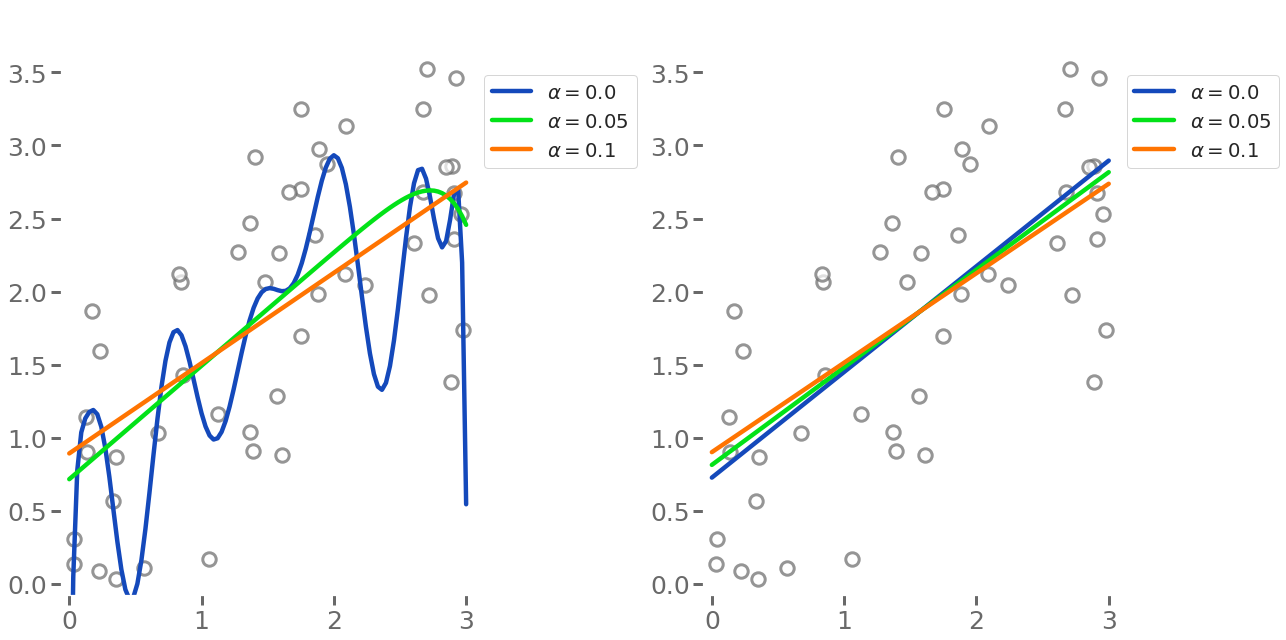

In [36]:
# vizualize how Lasso regression reduces complexity in models with polynomial features
p = ptp.plotter.PrettierPlot(fig=plt.figure(), chart_prop=18)
for poly, position in zip([True, False], [121, 122]):
    plotModel(
        X=X,
        y=y,
        X_new=X_new,
        model_class=linear_model.Lasso,
        polynomial=poly,
        alphas=np.linspace(0, 0.1, 3),
        position=position,
    )

> The left plot show the regularized linear regression for varying levels of alpha, using zero polynomial features. The right plot includes polynomial features. An alpha of 0 effectively cancels out the Lasso penalty, which prevents the Lasso model from reducing model complexity. The blue line in the right plot illustrates this nicely, as it is clear that the 10 degree polynomial model, paired with an alpha of 0, goes to great lengths to fit itself to the 20 randomly generated data points. Conversely, the green line in the right plot has a drastically gentler fit to the data points.

In [37]:
# prediction of a single data point
xi = [1.5]

lassoReg = linear_model.Lasso(alpha=0.1)
lassoReg.fit(X, y)
lassoReg.predict([xi])

array([1.820101])

## Example 2 - ridge regression 


<a id = 'Regularization-Example2'></a>

__Polynomial features, varying ridge regularization__

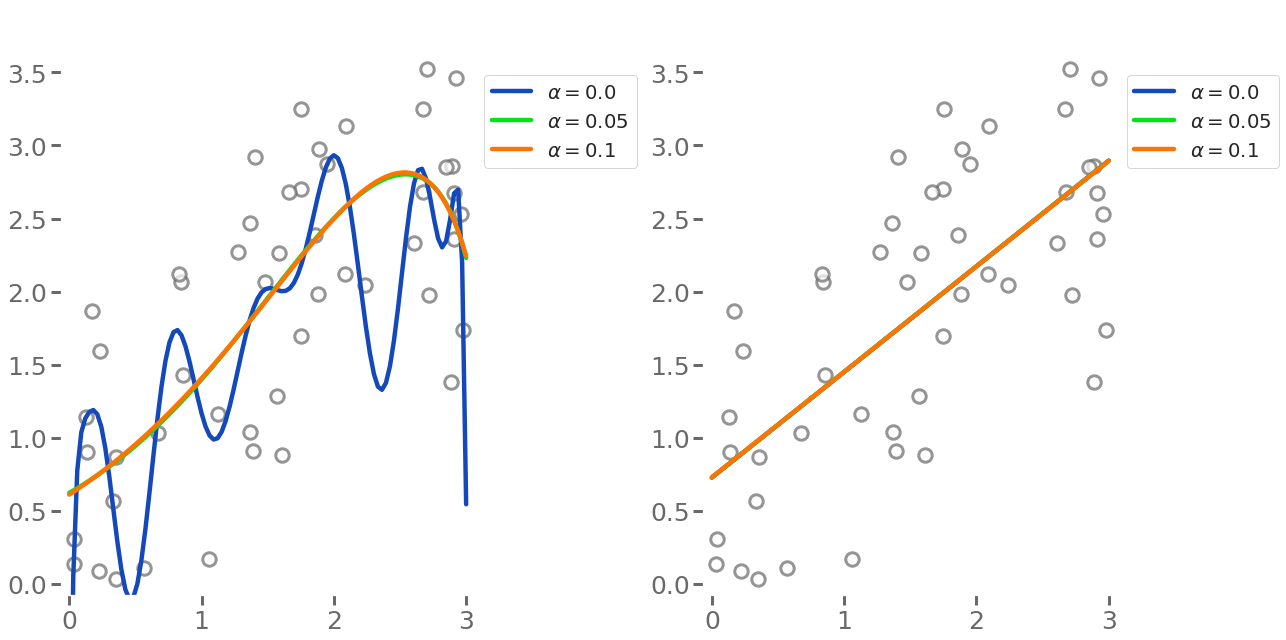

In [38]:
# Vizualize how Ridge regression reduces complexity in models with polynomial features

p = ptp.plotter.PrettierPlot(fig=plt.figure(), chart_prop=18)
for poly, position in zip([True, False], [121, 122]):
    plotModel(
        X=X,
        y=y,
        X_new=X_new,
        model_class=linear_model.Ridge,
        polynomial=poly,
        alphas=np.linspace(0, 0.1, 3),
        position=position,
    )

__Ridge regression, different implementations__

Make a prediction using a single prediction with different variantes of ridge regression

In [39]:
# create single data point for prediction
xi = [1.5]

In [40]:
# Cholesky solver
ridge_reg = linear_model.Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([xi])

array([[1.81327008]])

In [41]:
# sag solver
ridge_reg = linear_model.Ridge(alpha=1, solver="sag")
ridge_reg.fit(X, y)
ridge_reg.predict([xi])

array([[1.81331428]])

In [42]:
# SGDRegressor
sgd_reg = linear_model.SGDRegressor(penalty="l2", random_state=42, max_iter=1000)
sgd_reg.fit(X, y)
sgd_reg.predict([xi])

array([1.75777887])

## Example 3 - ElasticNet linear regression


<a id = 'Regularization-Example3'></a>

In [43]:
# execute
xi = [1.5]

elastic_net = linear_model.ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([xi])

array([1.81863897])

<a id = 'Case-study-boston'></a>

# Case study - boston housing market 


In [44]:
# generate and scale data
boston = datasets.load_boston()
X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42)

sc = preprocessing.StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
# execute
lin_reg = linear_model.SGDRegressor(penalty="l1", alpha=0.5)
lin_reg.fit(X_train, y_train)
print("Train R\u00b2: {0}".format(lin_reg.score(X_train, y_train)))
print("Test R\u00b2: {0}".format(lin_reg.score(X_test, y_test)))
print("Model intercept: {0}".format(lin_reg.intercept_[0]))
print("Model coefficients: {0}".format(lin_reg.coef_))

Train R²: 0.7088049573397239
Test R²: 0.6366632841345243
Model intercept: 22.888345962082774
Model coefficients: [-0.35381385  0.          0.          0.43818221  0.          3.28995693
  0.         -0.20204373  0.          0.         -1.45832104  0.79015805
 -3.58823847]


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


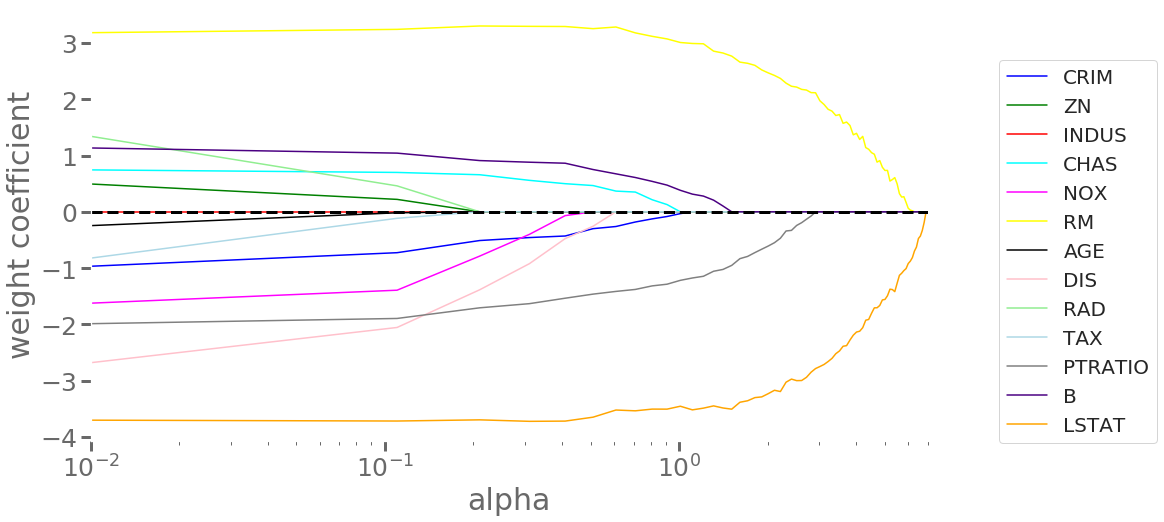

In [46]:
# visualize
fig = plt.figure(figsize=(15, 8))
ax = plt.subplot(111)
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)

colors = [
    "blue",
    "green",
    "red",
    "cyan",
    "magenta",
    "yellow",
    "black",
    "pink",
    "lightgreen",
    "lightblue",
    "gray",
    "indigo",
    "orange",
]

weights, params = [], []
for a in np.arange(0.01, 7, 0.1):
    lin_reg = linear_model.SGDRegressor(penalty="l1", alpha=a)
    lin_reg.fit(X_train, y_train)
    weights.append(lin_reg.coef_)
    params.append(a)
weights = np.array(weights)

for col, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, col], label=df_boston.columns[col], color=color)
plt.axhline(0, color="black", linestyle="--", linewidth=3)
plt.xlim([10 ** (-2), 7])
plt.ylabel("weight coefficient", size=30)
plt.xlabel("alpha", size=30)
plt.xscale("log")
plt.legend(loc="upper left")
ax.legend(
    loc="upper center", bbox_to_anchor=(1.18, 0.9), ncol=1, fancybox=True, fontsize=20
)
plt.show()

> Remarks - This visual illustrates how the individual weights for each feature in the data set are driven toward zero as the regulatization parameter $\alpha$ increases



# Sequential feature selection

Sequential feature selection is a technique for reducing the initial d-dimensional space to a feature space of k dimensions, where k < d. This technique seeks to remove irrelevant features and thereby increase computational efficiency. This can be especially useful when using an algorithm that does not support regularization, such as Lasso regression. Further, it's possible that sequential feature selection can improve a model's predictive power if models based on the full data set are overfitting.


<a id = 'Sequential-feature-selection'></a>

## Example 1 - Selecting meaningful features for regression


<a id = 'Sequential-feature-selection-Example1'></a>

__Custom class__

In [47]:
# custom functions
class SBS:
    def __init__(
        self,
        estimator,
        k_feat,
        scoring=metrics.accuracy_score,
        test_size=0.25,
        random_state=42,
    ):
        """
        Documentation:
            Description:
                Initialize object for completing sequential feature selection.
            Parameters
                estimator : sklearn model
                    Model to be used in sequential feature selection.
                k_feat : int
                    Set the floor on the minimum number of features to select.
                scoring : sklearn scoring metric, default = accuracy_score
                    Metric used for determining model performance.
                test_size : float, default 0.25
                    Proportion of dataset to set aside as a test set.
                random_state : int, default 42
                    Seed for random attribute generator.
        """
        self.scoring = scoring
        self.estimator = base.clone(estimator)
        self.k_feat = k_feat
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y, scale=True):
        """
        Documentation:
            Description:
                Fit method performs sequential feature selection on input data arrays
            Parameters
                X : Array
                    Array containing independent variables
                y : Array
                    Array containing observation labels
                scale : bool, default = True
                    Switch for determining whether to perform standard scaling on the data
            Return 
                self            
        """
        # Perform train/test split
        X_train, X_test, y_train, y_test = model_selection.train_test_split(
            X, y, test_size=self.test_size, random_state=self.random_state
        )

        # Performing standard scaling on data
        if scale:
            sc = preprocessing.StandardScaler()
            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)

        dim = X_train.shape[1]  # Number of columns in X
        self.indices_ = tuple(
            range(dim)
        )  # tuple containing index values of each feature
        self.subsets_ = [
            self.indices_
        ]  # _subsets will hold all indices evaluated at each stage. Initialize to include all.
        score = self._calcScore(
            X_train, X_test, y_train, y_test, self.indices_
        )  # Score calls the _calcScore method below
        self.scores_ = [
            score
        ]  # scores_ will contain the score returned by the _calcScore attribute

        # While dim is higher than the chosen minimum feature value, run _calcScore method on
        # specified features in X
        while dim > self.k_feat:
            scores = []
            subsets = []
            for p in itertools.combinations(self.indices_, r=dim - 1):
                score = self._calcScore(X_train, X_test, y_train, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(
                scores
            )  # Update best to max of scores if latest score is best
            self.indices_ = subsets[
                best
            ]  # Update indices_ to the best subset based on best score
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
        self.kScore_ = self.scores_[-1]
        return self

    def transform(self, X):
        """
        Documentation:
            Description:
                Transform data array X such that it only includes features 
                chosen by sequential feature selection.
            Parameters
                X : Array
                    Array containing independent variables.
            Return
                X : Array
                    Array containing independent variables with specific indices.
        """
        return X[:, self.indices_]

    def _calcScore(self, X_train, X_test, y_train, y_test, indices):
        """
        Documentation:
            Description:
                Using training data, fit model using selected estimator and evaluate using selected scoring metric.
                Score method based on performance on test set.
            Parameters
                X_train : Array
                    Indepdendent variables, training data
                X_test : Array
                    Indepdendent variables, test data
                y_train : Array
                    Observations labels, training data
                y_test : Array
                    Observations labels, test data
            Return
                score : float
                    Score return by selected scoring metric
        """
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

>Remarks - k_feat represents the desired number of features we want to return. The class defaults to using accuracy_score to evaluate model performance on the feature subsets. The while loop continues until reaching the specified level of dimensionality, and in each loop collects the score of the feature subset based on X_test. The indices of the columns are assigned to self.indices_, which can be used with transform to return a new data array with only the selected feature column


In [48]:
# generate, split and scale data
boston = datasets.load_boston()
X = boston.data
y = boston.target
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston[:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.006320,18.000000,2.310000,0.000000,0.538000,6.575000,65.200000,4.090000,1.000000,296.000000,15.300000,396.900000,4.980000
1,0.027310,0.000000,7.070000,0.000000,0.469000,6.421000,78.900000,4.967100,2.000000,242.000000,17.800000,396.900000,9.140000
2,0.027290,0.000000,7.070000,0.000000,0.469000,7.185000,61.100000,4.967100,2.000000,242.000000,17.800000,392.830000,4.030000
3,0.032370,0.000000,2.180000,0.000000,0.458000,6.998000,45.800000,6.062200,3.000000,222.000000,18.700000,394.630000,2.940000
4,0.069050,0.000000,2.180000,0.000000,0.458000,7.147000,54.200000,6.062200,3.000000,222.000000,18.700000,396.900000,5.330000


__SBS, Scoring = $R^2$__

Determine which subset of features explains the most variance in the data.

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


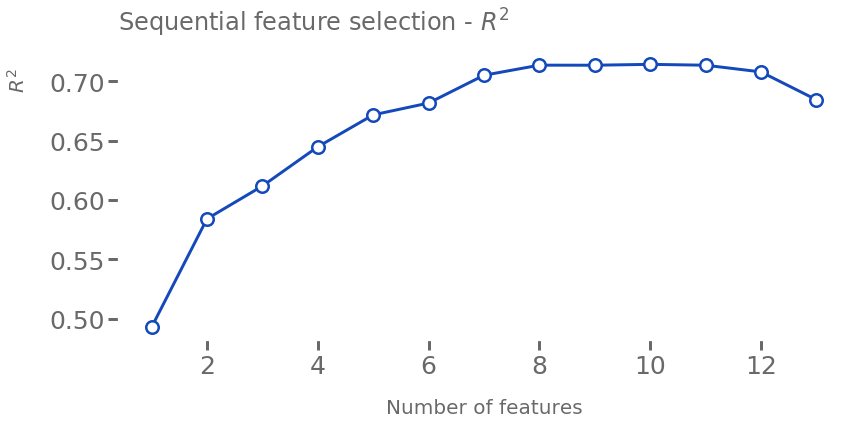

In [49]:
# feature selection - R-squared
lin_reg = linear_model.LinearRegression()

sbs = SBS(lin_reg, k_feat=1, scoring=metrics.r2_score)
sbs.fit(X, y)

# visualize data and overlay line of best fit
p = ptp.plotter.PrettierPlot(fig=plt.figure(), chart_prop=12)
ax = p.make_canvas(
    title=r"Sequential feature selection - $R^2$",
    x_label="Number of features",
    y_label="$R^2$",
    y_shift=0.9,
)
p.line(
    x=np.arange(1, len(sbs.subsets_) + 1),
    y=np.array(sbs.scores_[::-1]),
    marker_on=True,
    y_units="fff",
    ax=ax,
)

In [50]:
# list all feature subset and corresponding score
list(
    zip(
        np.arange(len(sbs.subsets_)),
        np.arange(1, len(sbs.subsets_) + 1)[::-1],
        np.round(sbs.scores_, 4),
        sbs.subsets_,
    )
)

[(0, 13, 0.6844, (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)),
 (1, 12, 0.7078, (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12)),
 (2, 11, 0.7135, (0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 12)),
 (3, 10, 0.7142, (0, 1, 3, 4, 6, 7, 8, 9, 10, 12)),
 (4, 9, 0.7135, (1, 3, 4, 6, 7, 8, 9, 10, 12)),
 (5, 8, 0.7135, (1, 4, 6, 7, 8, 9, 10, 12)),
 (6, 7, 0.705, (1, 4, 7, 8, 9, 10, 12)),
 (7, 6, 0.6816, (1, 4, 7, 8, 10, 12)),
 (8, 5, 0.6717, (1, 4, 7, 10, 12)),
 (9, 4, 0.6448, (4, 7, 10, 12)),
 (10, 3, 0.6118, (7, 10, 12)),
 (11, 2, 0.5841, (10, 12)),
 (12, 1, 0.4929, (12,))]

In [51]:
# print columns names of feature from highest scoring subset
best_subset = list(sbs.subsets_[3])
df_boston.columns[best_subset]

Index(['CRIM', 'ZN', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
       'LSTAT'],
      dtype='object')

__SBS, Scoring = mean squared error__

Determine which subset of features achieves the lowest mean squared error

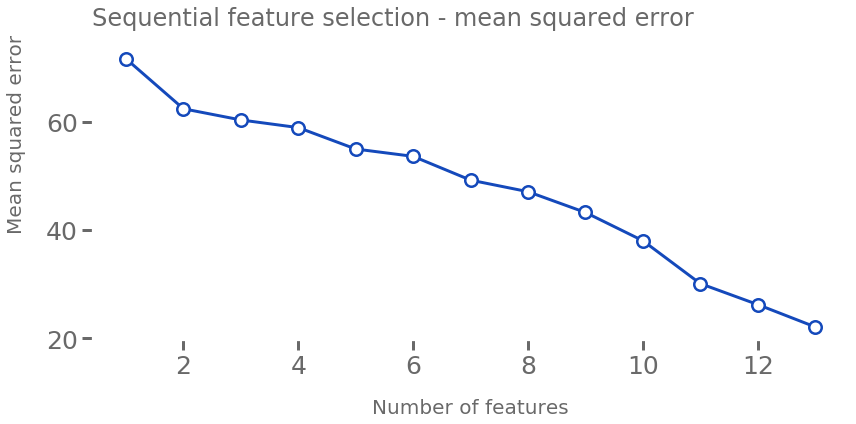

In [52]:
# feature selection - explained variance
lin_reg = linear_model.LinearRegression()

sbs = SBS(lin_reg, k_feat=1, scoring=metrics.mean_squared_error)
sbs.fit(X, y)

# visualize data and overlay line of best fit
p = ptp.plotter.PrettierPlot(fig=plt.figure(), chart_prop=12)
ax = p.make_canvas(
    title="Sequential feature selection - mean squared error",
    x_label="Number of features",
    y_label="Mean squared error",
    y_shift=0.7,
)
p.line(
    x=np.arange(1, len(sbs.subsets_) + 1).reshape(-1, 1),
    y=np.array(sbs.scores_[::-1]),
    marker_on=True,
    ax=ax,
)

>Remarks - In the visualization above, it's clear the mean squared error improves with each additional new feature. 

__Compare full model against best subset according to explained variance__

In [53]:
# feature selection - explained variance
lin_reg = linear_model.LinearRegression()

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.25, random_state=42
)

lin_reg.fit(X_train, y_train)
print("Training accuracy: {:.3f}".format(lin_reg.score(X_train, y_train)))
print("Test accuracy: {:.3f}".format(lin_reg.score(X_test, y_test)))

lin_reg.fit(X_train[:, best_subset], y_train)
print(
    "Training accuracy, subset: {:.3f}".format(
        lin_reg.score(X_train[:, best_subset], y_train)
    )
)
print("Test accuracy, subset: {:.3f}".format(lin_reg.score(X_test[:, best_subset], y_test)))

Training accuracy: 0.748
Test accuracy: 0.684
Training accuracy, subset: 0.683
Test accuracy, subset: 0.714


>Remarks - The best feature subset includes only fitenve features. The model fit using the full data set outperforms the best subset model on the training data set, and the full data set model underperforms the best subset model on the test data set. 

## Example 2 - Selecting meaningful features for classification


<a id = 'Sequential-feature-selection-Example2'></a>

In [54]:
# load and inspect data
wine = datasets.load_wine()
X = wine.data
y = wine.target
df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)

df_wine[:5]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.230000,1.710000,2.430000,15.600000,127.000000,2.800000,3.060000,0.280000,2.290000,5.640000,1.040000,3.920000,"1,065.000000"
1,13.200000,1.780000,2.140000,11.200000,100.000000,2.650000,2.760000,0.260000,1.280000,4.380000,1.050000,3.400000,"1,050.000000"
2,13.160000,2.360000,2.670000,18.600000,101.000000,2.800000,3.240000,0.300000,2.810000,5.680000,1.030000,3.170000,"1,185.000000"
3,14.370000,1.950000,2.500000,16.800000,113.000000,3.850000,3.490000,0.240000,2.180000,7.800000,0.860000,3.450000,"1,480.000000"
4,13.240000,2.590000,2.870000,21.000000,118.000000,2.800000,2.690000,0.390000,1.820000,4.320000,1.040000,2.930000,735.000000


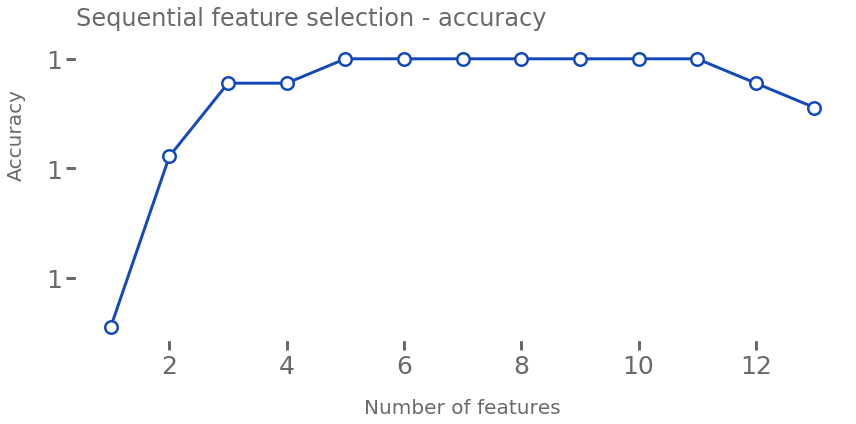

In [55]:
# K Nearest Neighbors, accuracy score
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

sbs = SBS(knn, k_feat=1)
sbs.fit(X, y)

# visualize data and overlay line of best fit
p = ptp.plotter.PrettierPlot(fig=plt.figure(), chart_prop=12)
ax = p.make_canvas(
    title="Sequential feature selection - accuracy",
    x_label="Number of features",
    y_label="Accuracy",
    y_shift=0.7,
)
p.line(
    x=np.arange(1, len(sbs.subsets_) + 1).reshape(-1, 1),
    y=np.array(sbs.scores_[::-1]),
    marker_on=True,
    ax=ax,
)

> Remarks - The accuracy of the KNN classifier improved on the validation data set as the number of features decreases from 13 to 5. This suggests that a less complex model with fewer features lead to a better model. Given these results, we would proceed with the model based on a 5 feature set.

In [56]:
# list all feature subset and corresponding score
list(
    zip(
        np.arange(len(sbs.subsets_)),
        np.arange(1, len(sbs.subsets_) + 1)[::-1],
        np.round(sbs.scores_, 4),
        sbs.subsets_,
    )
)

[(0, 13, 0.9556, (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)),
 (1, 12, 0.9778, (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12)),
 (2, 11, 1.0, (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12)),
 (3, 10, 1.0, (0, 1, 2, 3, 4, 5, 6, 7, 9, 12)),
 (4, 9, 1.0, (0, 1, 2, 3, 4, 6, 7, 9, 12)),
 (5, 8, 1.0, (0, 1, 2, 3, 6, 7, 9, 12)),
 (6, 7, 1.0, (0, 1, 2, 3, 6, 9, 12)),
 (7, 6, 1.0, (0, 1, 2, 6, 9, 12)),
 (8, 5, 1.0, (0, 2, 6, 9, 12)),
 (9, 4, 0.9778, (0, 6, 9, 12)),
 (10, 3, 0.9778, (0, 6, 9)),
 (11, 2, 0.9111, (0, 6)),
 (12, 1, 0.7556, (6,))]

In [57]:
# print column names of best feature subset
best_subset = list(sbs.subsets_[8])
df_wine.columns[best_subset]

Index(['alcohol', 'ash', 'flavanoids', 'color_intensity', 'proline'], dtype='object')

In [58]:
# feature selection - explained variance
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.25, random_state=42
)

knn.fit(X_train, y_train)
print("Training accuracy: {:.3f}".format(knn.score(X_train, y_train)))
print("Test accuracy: {:.3f}".format(knn.score(X_test, y_test)))

knn.fit(X_train[:, best_subset], y_train)
print(
    "Training accuracy, subset: {:.3f}".format(knn.score(X_train[:, best_subset], y_train))
)
print("Test accuracy, subset: {:.3f}".format(knn.score(X_test[:, best_subset], y_test)))

Training accuracy: 0.767
Test accuracy: 0.711
Training accuracy, subset: 0.820
Test accuracy, subset: 0.756


>Remarks - The model trained using the best subset substantially outperforms the model trained using the full data set.

# Feature importance assessment using random forest

Create a model using RnadomForestClassifier, evaluate and visualize the feature_importances_ values. 
Utilize SelectFromModel to create a classifier using only features that meet a set level of importance.

<a id = 'Feature-importance-assessment'></a>

In [59]:
# generate, #split and scale data
wine = datasets.load_wine()
X = wine.data
y = wine.target
df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)

df_wine[:5]

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.2, random_state=42
)

sc = preprocessing.StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [60]:
# train random forest classifier
rf = ensemble.RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [61]:
# sort feature importance values and retrieve feature indices
# reverse sort order of indices to move most important features to beginning
indices = np.argsort(rf.feature_importances_)[::-1]

In [62]:
# print column name with corresponding importance in descending order
for col in range(X_train.shape[1]):
    print(
        "{0}) {1} = {2}".format(
            col + 1,
            df_wine.columns[indices[col]],
            round(rf.feature_importances_[indices[col]], 4),
        )
    )

1) color_intensity = 0.1645
2) flavanoids = 0.1627
3) proline = 0.1523
4) od280/od315_of_diluted_wines = 0.1422
5) alcohol = 0.1167
6) hue = 0.0685
7) total_phenols = 0.0512
8) alcalinity_of_ash = 0.0402
9) malic_acid = 0.0281
10) magnesium = 0.0257
11) proanthocyanins = 0.0206
12) ash = 0.0163
13) nonflavanoid_phenols = 0.0109


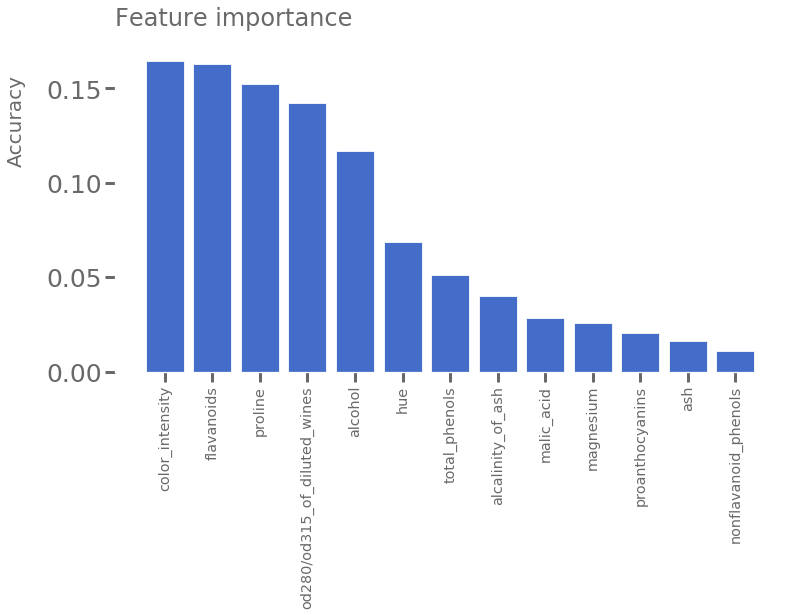

In [67]:
# visualize feature importance
p = ptp.plotter.PrettierPlot(fig=plt.figure(), chart_prop=12)
ax = p.make_canvas(title="Feature importance", y_label="Accuracy", y_shift=0.77)
p.bar_v(
    x=np.arange(1, len(indices) + 1),
    counts=rf.feature_importances_[indices],
    x_labels=df_wine.columns[indices],
    label_rotate=90,
    y_units="fff",
    ax=ax,
)

__SelectFromModel__

In [68]:
# transform original data into best subset
sfm = feature_selection.SelectFromModel(rf, threshold=0.1, prefit=True)
X_select = sfm.transform(X_train)
print("# of features meeting threshold: {0} \n".format(X_select.shape[1]))

for col in range(X_select.shape[1]):
    print(
        "{0}) {1} = {2}".format(
            col + 1,
            df_wine.columns[indices[col]],
            round(rf.feature_importances_[indices[col]], 4),
        )
    )

# of features meeting threshold: 5 

1) color_intensity = 0.1645
2) flavanoids = 0.1627
3) proline = 0.1523
4) od280/od315_of_diluted_wines = 0.1422
5) alcohol = 0.1167


# Parameter adjustment effects

It can be informative to observe how the train and test scores change as a particular parameter value changes.

<a id = 'Parameter-adjustment-effects'></a>

In [69]:
# custom functions
def getTrainTestScores(df, model, scoringMetric):
    """
    Documentation:
        Description: 
            Creates a Pandas DataFrame with 3 columns: Train score, test score, and a column containing 
            different values for a chosen parameter. The resulting data set can be easily visualized to 
            show how the train and test scores change and compare as the parameter changes.

        Parameters
            df : Pandas DataFrame
                Dataset for modeling.
            model : sklearn model 
                Model of choice for learning data set.
            scoreMetric : sklearn metric
                Metric for evaluating model success.
        Return
            trainScore : 
            test_scores :
    """
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values

    X_train, X_test, y_train, y_test = model_selection.train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_scores = scoringMetric(y_pred_train, y_train)
    test_scores = scoringMetric(y_pred_test, y_test)
    return train_scores, test_scores

In [70]:
# load and inspect data
data = datasets.load_boston()
X = data.data
y = data.target.reshape(-1, 1)
df = pd.DataFrame(np.c_[X, y], columns=data.feature_names.tolist() + ["MEDV"])

df[:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006320,18.000000,2.310000,0.000000,0.538000,6.575000,65.200000,4.090000,1.000000,296.000000,15.300000,396.900000,4.980000,24.000000
1,0.027310,0.000000,7.070000,0.000000,0.469000,6.421000,78.900000,4.967100,2.000000,242.000000,17.800000,396.900000,9.140000,21.600000
2,0.027290,0.000000,7.070000,0.000000,0.469000,7.185000,61.100000,4.967100,2.000000,242.000000,17.800000,392.830000,4.030000,34.700000
3,0.032370,0.000000,2.180000,0.000000,0.458000,6.998000,45.800000,6.062200,3.000000,222.000000,18.700000,394.630000,2.940000,33.400000
4,0.069050,0.000000,2.180000,0.000000,0.458000,7.147000,54.200000,6.062200,3.000000,222.000000,18.700000,396.900000,5.330000,36.200000


Text(0.5, 4.995000000000001, 'Max tree depth')

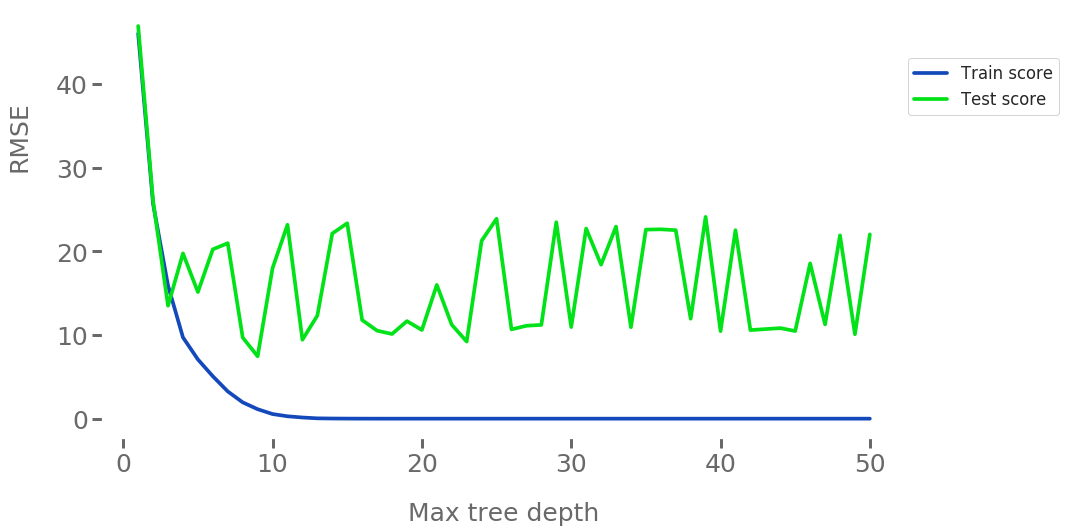

In [71]:
# generate scores for train/test data for varying levels of max tree depth
param = "max_depth"
results = pd.DataFrame(columns=["Train score", "Test score", param])
for i in np.arange(1, 51):
    model = tree.DecisionTreeRegressor(max_depth=i)
    train_scores, test_scores = getTrainTestScores(
        df=df, model=model, scoringMetric=metrics.mean_squared_error
    )
    results.loc[i] = [np.round(train_scores, 4), np.round(test_scores, 4), i]

p = ptp.plotter.PrettierPlot(fig=plt.figure(), chart_prop=15)
ax = p.make_canvas(title="", x_label="Max tree depth", y_label="MSE", y_shift=0.7)
p.line(
    df=results,
    x=results.columns[-1],
    y=results.columns[:-1],
    label=results.columns[:-1],
    y_multi_val=True,
    ax=ax,
)

plt.ylabel("RMSE")
plt.xlabel("Max tree depth")

> Remarks - The train and test scores improve rapidly as the max tree depth increases from 1 to about 5. From max tree depth 6 through 51 the training score continues to improve, while the test score becomes rather erratic. The best model here depends on the use case, but it can be said that highest performing model that also generalizes well occurs where max tree depth is about 6.